<a href="https://colab.research.google.com/github/jananilakshminarayanan/DA-DS-projects/blob/main/selfprojects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem 1**

Case scenario: There are two columns of numbers, You have to group/cluster them in a way that highest gets clubbed with lowest etc.,

Prob Solution approach: Utilize the principle of anti clustering i.e
Clustering - Aim - Minimize Intra Cluster Distance Maximize Inter cluster Distance
Anti Clustering - Aim - Vice versa i.e
Max Intra cluster distance and Min Inter cluster Distance

I have used manual K-Means clustering, finding euclidean dist of two points and clustering/grouping points with max distances


In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# load dataset
data = pd.read_csv("invclust.csv", error_bad_lines = False)
print(data.shape)
print(data.head())

(19, 2)
     V1    V2
0   5.0  16.0
1   8.0  -8.0
2   9.0  14.0
3  15.0   3.0
4  89.0  84.0


<ipython-input-2-90f512fb7e6c>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv("invclust.csv", error_bad_lines = False)


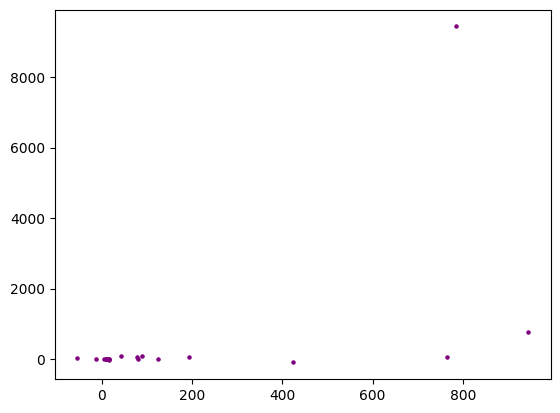

In [ ]:
# get values and plot for visualization
x = data['V1']
y = data['V2']
plt.scatter(x,y,c='purple',s=5)

In [ ]:
# create a single array which holds x & y points
f = np.array(list(zip(x,y)))
print(f)

[[ 5.0000e+00  1.6000e+01]
 [ 8.0000e+00 -8.0000e+00]
 [ 9.0000e+00  1.4000e+01]
 [ 1.5000e+01  3.0000e+00]
 [ 8.9000e+01  8.4000e+01]
 [ 4.2000e+01  9.2540e+01]
 [ 1.6000e+01  1.0000e+00]
 [ 7.9000e+01  1.5000e+01]
 [-5.4310e+01  3.1000e+01]
 [ 1.6000e+01 -2.6000e+01]
 [ 7.8000e+01  4.7000e+01]
 [ 1.2000e+01  1.7000e+01]
 [-1.3000e+01  1.6000e+01]
 [ 9.4500e+02  7.8200e+02]
 [ 7.8587e+02  9.4330e+03]
 [ 1.2400e+02 -1.3500e+00]
 [ 7.6500e+02  4.9000e+01]
 [ 1.9400e+02  7.3000e+01]
 [ 4.2300e+02 -9.5000e+01]]


In [ ]:
# initialize k value, empty clusters array and random centroids
k = 2
clusters = {}
for i in range(k):
  clusters[i] = []

centroids = []
for i in range(k):
    centroids.append(f[i])

print(clusters)
print(centroids)

{0: [], 1: []}
[array([ 5., 16.]), array([ 8., -8.])]


In [ ]:
type(centroids)

list

**Reference:**
Euclidean distance is the shortest distance possible between two geometric points. Its formula is calculated using the pythogoram`s theorem i.e hyp = sqrt of sum of squares of other two sides of triangle

In [ ]:
# kmeans using using eucledian dist
# calculate euclidean dist between cluster points and group them together based on max euc values
# recalculate centroids and repeat the clustering process for whole dataset

for data in f:
  euc_dist = []
  for j in range(k):
    euc_dist.append(np.linalg.norm(data - centroids[j]))
    clusters[euc_dist.index(max(euc_dist))].append(data)

  for i in range(k):
    centroids[i] = np.average(clusters[i], axis=0)

print(clusters)
print(centroids)


{0: [array([ 5., 16.]), array([ 8., -8.]), array([ 8., -8.]), array([ 9., 14.]), array([ 9., 14.]), array([15.,  3.]), array([89., 84.]), array([89., 84.]), array([42.  , 92.54]), array([16.,  1.]), array([79., 15.]), array([-54.31,  31.  ]), array([-54.31,  31.  ]), array([ 16., -26.]), array([ 16., -26.]), array([78., 47.]), array([78., 47.]), array([12., 17.]), array([-13.,  16.]), array([945., 782.]), array([ 785.87, 9433.  ]), array([ 785.87, 9433.  ]), array([124.  ,  -1.35]), array([124.  ,  -1.35]), array([765.,  49.]), array([765.,  49.]), array([194.,  73.]), array([194.,  73.]), array([423., -95.]), array([423., -95.])], 1: [array([ 5., 16.]), array([15.,  3.]), array([42.  , 92.54]), array([16.,  1.]), array([79., 15.]), array([12., 17.]), array([-13.,  16.]), array([945., 782.])]}
[array([199.204     , 671.46133333]), array([137.625 , 117.8175])]


In [ ]:
centroids = np.array(centroids)

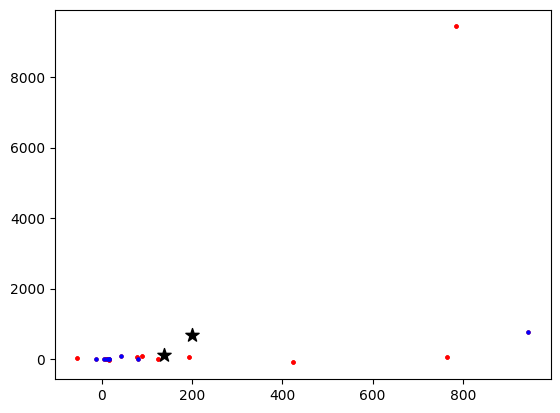

In [ ]:
# plot the different cluster points in diff colours and centroids using scatter plot
colours = ['red','blue','green']
for i in range(k):
  c = np.array(clusters[i])
  plt.scatter(c[:,0],c[:,1], s=5,c=colours[i])
plt.scatter(centroids[:,0], centroids[:,1], marker='*', s=100, c='black')


Test out the solution using different input cases

In [ ]:
np.random.seed(4)
df = pd.DataFrame(np.random.randint(10, size=(10,2)), columns=['x','y'])
df

,x,y
0,7,5
1,1,8
2,7,8
3,2,9
4,7,7
5,7,9
6,8,4
7,2,6
8,4,3
9,0,7


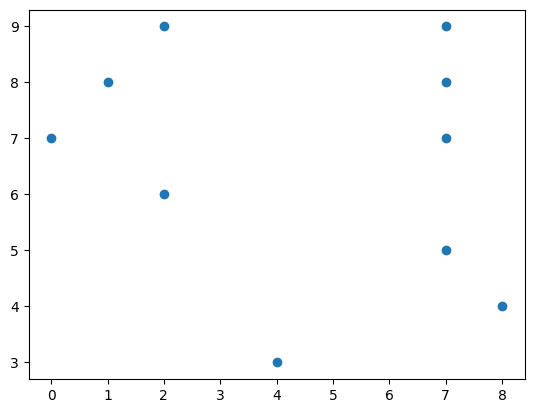

In [ ]:
x1 = df['x']
y1 = df['y']
plt.scatter(x1,y1)

In [ ]:
f1 = np.array(list(zip(x1,y1)))
print(f1)

[[7 5]
 [1 8]
 [7 8]
 [2 9]
 [7 7]
 [7 9]
 [8 4]
 [2 6]
 [4 3]
 [0 7]]


In [ ]:
# initialize k value, empty clusters array and random centroids
k = 2
clust = {}
for i in range(k):
  clust[i] = []

centr = []
for i in range(k):
    centr.append(f1[i])

print(clust)
print(centr)

{0: [], 1: []}
[array([7, 5]), array([1, 8])]


In [ ]:
# kmeans using using eucledian dist
# calculate euclidean dist between cluster points and group them together based on max euc values
# recalculate centroids and repeat the clustering process for whole dataset

for data in f1:
  euc_dist = []
  for j in range(k):
    euc_dist.append(np.linalg.norm(data - centr[j]))
    clust[euc_dist.index(max(euc_dist))].append(data)

  for i in range(k):
    centr[i] = np.average(clust[i], axis=0)

print(clust)
print(centr)


{0: [array([7, 5]), array([1, 8]), array([1, 8]), array([7, 8]), array([7, 8]), array([2, 9]), array([7, 7]), array([7, 7]), array([7, 9]), array([8, 4]), array([8, 4]), array([2, 6]), array([2, 6]), array([4, 3]), array([0, 7])], 1: [array([7, 5]), array([2, 9]), array([7, 9]), array([4, 3]), array([0, 7])]}
[array([4.66666667, 6.6       ]), array([4. , 6.6])]


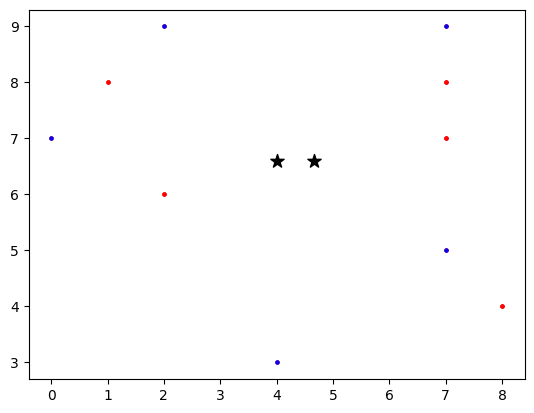

In [ ]:
# plot the different cluster points in diff colours and centroids using scatter plot
centr = np.array(centr)
colours = ['red','blue','green']
for i in range(k):
  c = np.array(clust[i])
  plt.scatter(c[:,0],c[:,1], s=5,c=colours[i])
plt.scatter(centr[:,0], centr[:,1], marker='*', s=100, c='black')


**Problem 2**

Case Scenario: create 5 columns filled in with random numbers. find out which two columns are behaving alike and group them together

Prob Solution approach: Major aim is to find whether colinearity exists between columns. This can be achieved using feature engineering techniques such as pearson correlation, anova or even chi sqr testing method

In [ ]:
# import libraries
import numpy as np
import pandas as pd
import random

# create dataset
# create two even no columns just to check whether they are grouped together
# using seed will eliminate randomness and establish a ground value i.e same swet of random values will be generated each time of execution

col1 = []
col2 = []
for x in range(10):
  np.random.seed(10)
  col1.append(random.randrange(2,50,2))
  # create colinearity btw columns by creating a linear relation and add some random noise to it
  col2.append(col1[x] * 2 + random.randint(0,10))

col345 = np.random.randint(1,50,(10,3))

df = pd.DataFrame(col345)
df[3] = col1
df[4] = col2

df

,0,1,2,3,4
0,10,37,16,16,38
1,1,29,26,2,10
2,30,49,30,4,10
3,9,10,1,10,30
4,43,41,37,8,21
5,17,37,48,4,14
6,12,25,44,38,85
7,34,9,37,12,33
8,15,14,6,44,94
9,14,26,14,8,25


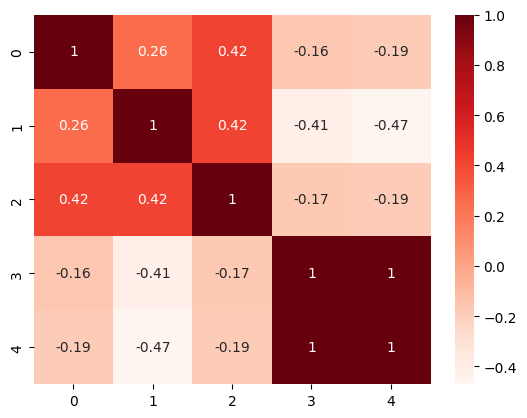

In [ ]:
# using pearson correlation testing method we can do a heatmap plot of features to find out their colinearit deg
# the value pairs nearing to 1 has most colinearity i.e exhibit similar behaviour
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#Using Pearson Correlation
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()


In [ ]:
import copy
cor1 = copy.deepcopy(cor)
cor1

,0,1,2,3,4
0,1.000000,0.255566,0.415569,-0.164896,-0.188548
1,0.255566,1.000000,0.418637,-0.414676,-0.470965
2,0.415569,0.418637,1.000000,-0.171973,-0.185611
3,-0.164896,-0.414676,-0.171973,1.000000,0.996818
4,-0.188548,-0.470965,-0.185611,0.996818,1.000000


In [ ]:
# find 2nd max value of corelation columnwise as 1st max will always be 1.00 with self
# create a dict which has columnwise index and 2nd max value pairs
max2 = {}
for (colname,colval) in cor1.items():

  #print(colname, colval.values)
  col = colval.values
  col.sort()
  #print(colname, col[-2])
  max2[colname] = col[-2]

print(max2)


{0: 0.4155686768314915, 1: 0.4186370002698277, 2: 0.4186370002698277, 3: 0.9968184657219145, 4: 0.9968184657219145}


In [ ]:
cor

,0,1,2,3,4
0,1.000000,0.255566,0.415569,-0.164896,-0.188548
1,0.255566,1.000000,0.418637,-0.414676,-0.470965
2,0.415569,0.418637,1.000000,-0.171973,-0.185611
3,-0.164896,-0.414676,-0.171973,1.000000,0.996818
4,-0.188548,-0.470965,-0.185611,0.996818,1.000000


In [ ]:
# create a dict that holds row and col index of 2nd max values
col_pairs = {}
for i in range(len(cor)):
  rowname = cor[cor[i] == max2[i]].index.tolist()
  col_pairs[i] = rowname
col_pairs

{0: [2], 1: [2], 2: [1], 3: [4], 4: [3]}

from above result its clear that the most related column pairs are as follows:

In descending order of precedence:

col3 --> col4

col1 --> col2

col0 --> col2

In [ ]:
# test case
np.random.seed(16)
random_numbers = np.random.randint(1,50,(10,5))
df1 = pd.DataFrame(random_numbers)
df1

,0,1,2,3,4
0,42,47,6,2,5
1,32,5,42,33,17
2,31,47,19,33,2
3,32,11,35,15,30
4,14,1,38,29,29
5,45,9,35,38,42
6,37,18,41,45,15
7,38,32,48,40,22
8,16,47,47,41,45
9,17,9,22,19,21


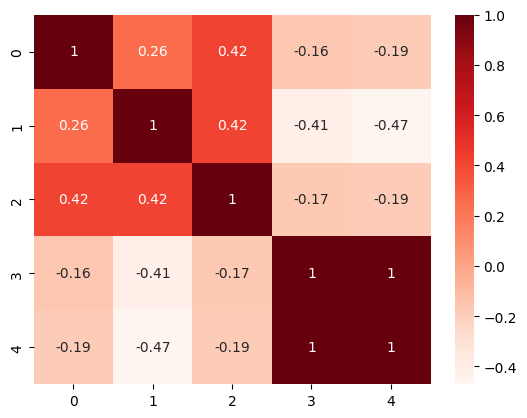

In [ ]:
#Using Pearson Correlation
cor2 = df.corr()
sns.heatmap(cor2, annot=True, cmap=plt.cm.Reds)
plt.show()


In [ ]:
cor3 = copy.deepcopy(cor2)
cor3

,0,1,2,3,4
0,1.000000,0.255566,0.415569,-0.164896,-0.188548
1,0.255566,1.000000,0.418637,-0.414676,-0.470965
2,0.415569,0.418637,1.000000,-0.171973,-0.185611
3,-0.164896,-0.414676,-0.171973,1.000000,0.996818
4,-0.188548,-0.470965,-0.185611,0.996818,1.000000


In [ ]:
max2_1 = {}
for (colname1,colval1) in cor3.items():

  #print(colname, colval.values)
  col1 = colval1.values
  col1.sort()
  #print(colname, col[-2])
  max2_1[colname1] = col1[-2]

# create a dict that holds row and col index of 2nd max values
col_pairs1 = {}
for i in range(len(cor2)):
  rowname1 = cor2[cor2[i] == max2_1[i]].index.tolist()
  col_pairs1[i] = rowname
col_pairs1




{0: [3], 1: [3], 2: [3], 3: [3], 4: [3]}